In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
data.shape, test.shape

((8693, 14), (4277, 13))

In [5]:
data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
data['Transported'] = data['Transported'].astype(int)
df = pd.concat([data, test], axis=0)

In [7]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000,8693.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482,0.503624
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [8]:
df.info(), df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   float64
dtypes: float64(7), object(7)
memory usage: 1.5+ MB


(None, 0)

Много nan значений, нет дубликатов данных

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

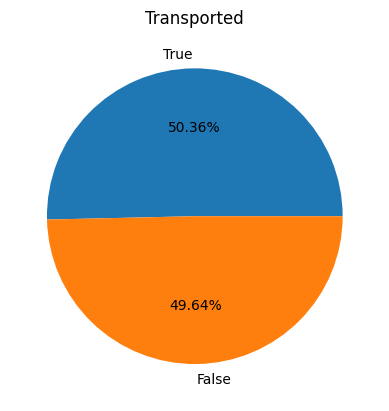

In [10]:
plt.pie(x=data['Transported'].value_counts(), labels=['True', 'False'], autopct='%.2f%%');
plt.title('Transported');

Равное распределение групп

# Data Visualization and Feature Engineering#

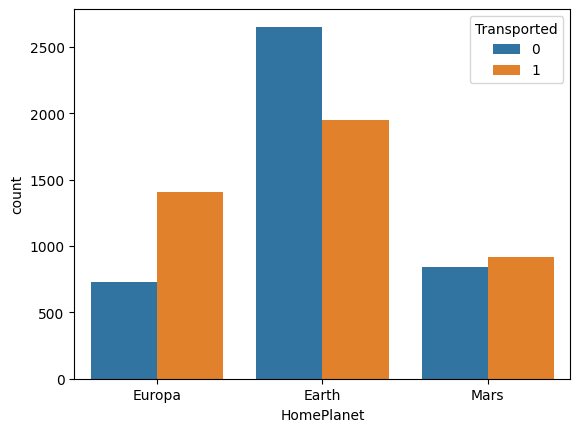

In [11]:
sns.countplot(data=data, x='HomePlanet', hue='Transported');

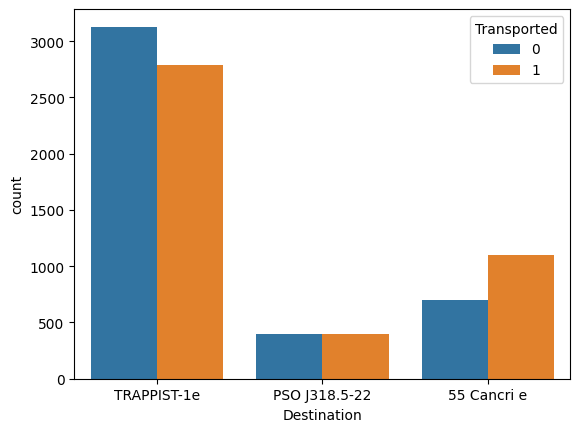

In [12]:
sns.countplot(data=data, x='Destination', hue='Transported');

Видим, что большинство людей направлялись на trappist-1e

In [13]:
pd.DataFrame(data.groupby(['HomePlanet','Destination','Transported']).size()).T

HomePlanet        Earth                                                Europa  \
Destination 55 Cancri e      PSO J318.5-22      TRAPPIST-1e       55 Cancri e   
Transported           0    1             0    1           0     1           0   
0                   342  348           357  355        1894  1207         275   

HomePlanet                                                 Mars       \
Destination      PSO J318.5-22     TRAPPIST-1e      55 Cancri e        
Transported    1             0   1           0    1           0    1   
0            611             5  14         434  755          75  118   

HomePlanet                                      
Destination PSO J318.5-22     TRAPPIST-1e       
Transported             0   1           0    1  
0                      27  22         720  755

Чаще всего люди отправлялись с Земли 

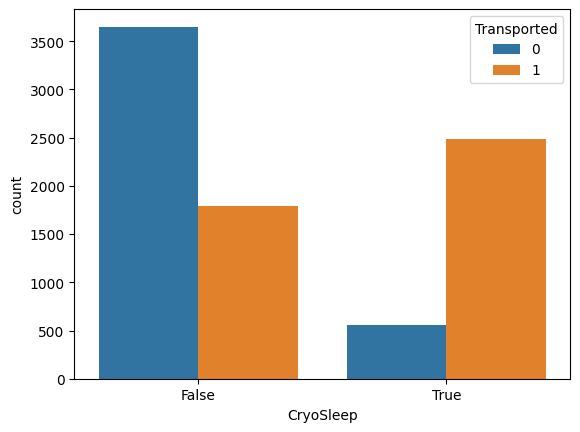

In [14]:
sns.countplot(data=data, x='CryoSleep', hue='Transported');

Находяиеся в криосне имели большую вероятность добраться до точки назначения

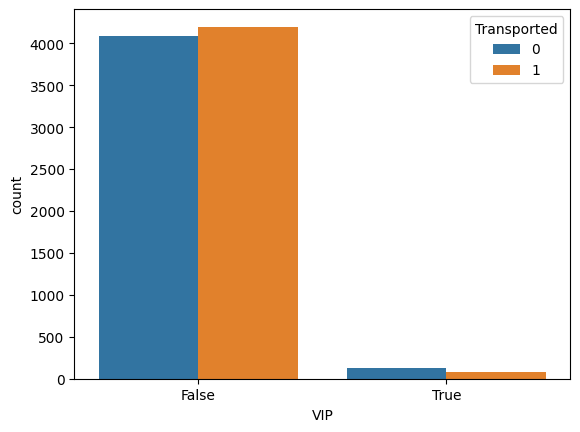

In [15]:
sns.countplot(data=data, x='VIP', hue='Transported');

В независимости от наличия статуса VIP, пассажиры имели примерно равные шансы добраться и не добраться

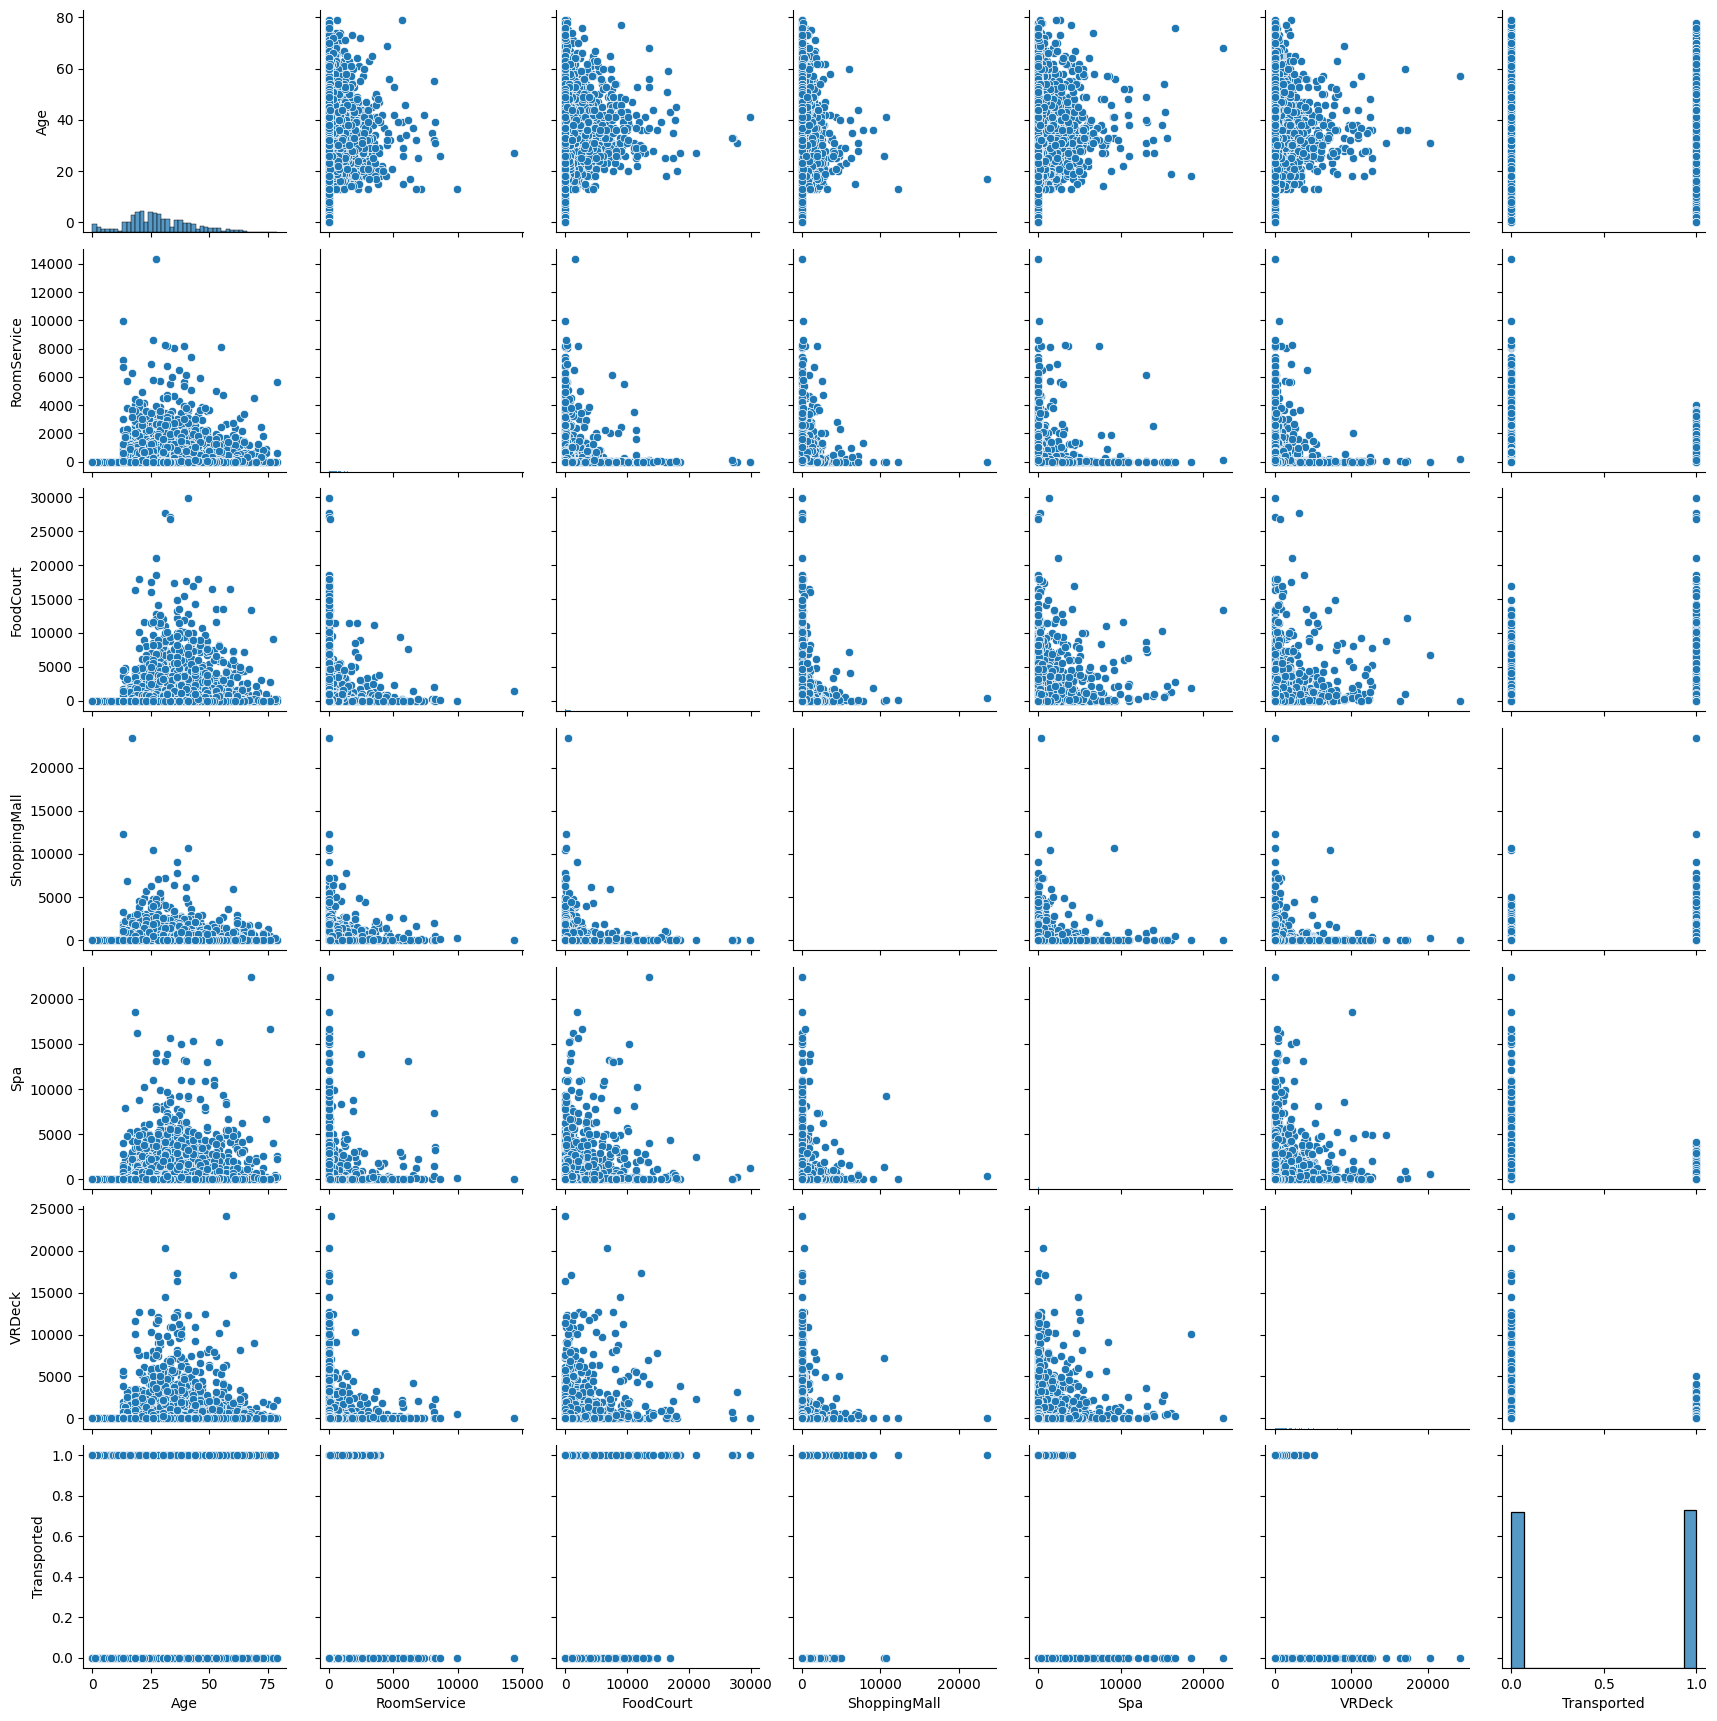

In [16]:
numeric_cols = data.select_dtypes(include = 'number').columns.tolist()
sns.pairplot(data[numeric_cols])

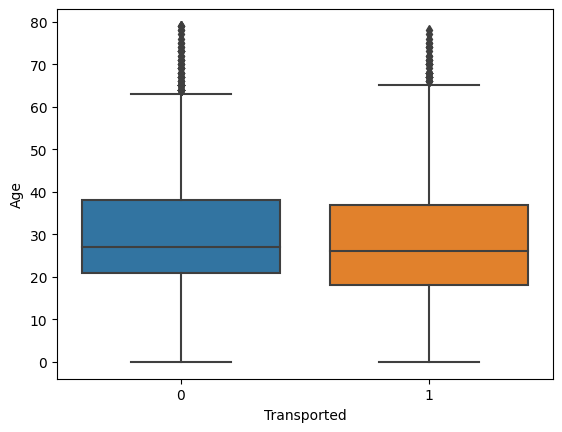

In [17]:
sns.boxplot(data=data, y='Age', x='Transported');

Нет заметной зависимости между возрастом и результатом поездки
- Много выбросов

In [18]:
df[['Group', 'Id']] = data['PassengerId'].str.split('_', expand=True)

In [19]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Id
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0.0,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0.0,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1.0,0004,01


In [20]:
cur_data = df.dropna()

Посмотрим на датасет без nan-значений

In [21]:
cur_data.groupby(['Group', 'HomePlanet', 'Destination'])['PassengerId'].value_counts()

Group  HomePlanet  Destination    PassengerId
0001   Europa      TRAPPIST-1e    0001_01        1
0002   Earth       TRAPPIST-1e    0002_01        1
0003   Europa      TRAPPIST-1e    0003_02        1
                                  0003_01        1
0004   Earth       TRAPPIST-1e    0004_01        1
                                                ..
9276   Europa      55 Cancri e    9276_01        1
9278   Earth       PSO J318.5-22  9278_01        1
9279   Earth       TRAPPIST-1e    9279_01        1
9280   Europa      55 Cancri e    9280_01        1
                   TRAPPIST-1e    9280_02        1
Name: count, Length: 6606, dtype: int64

Видим, что люди из одной группы имеют одинаковые точки отправления и прибытия

In [22]:
df['HomePlanet'].fillna(data['HomePlanet'].mode().iloc[0], inplace=True)
df['Destination'].fillna(data['Destination'].mode().iloc[0], inplace=True)

Заполним пустые значения HomePlanet и Destination наиболее частыми встречающимися значениями

<Axes: xlabel='HomePlanet', ylabel='count'>

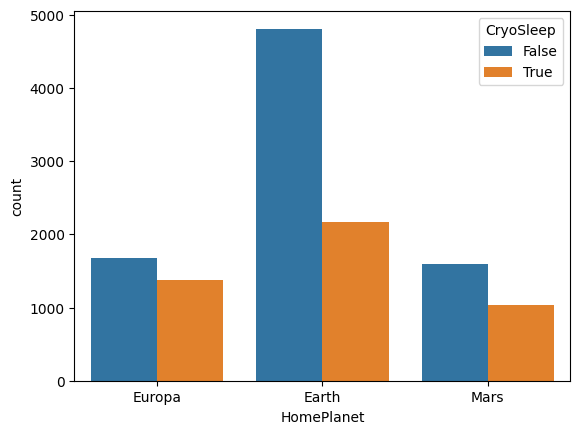

In [23]:
sns.countplot(data=df, x='HomePlanet', hue='CryoSleep')

In [24]:
df['CryoSleep'].fillna(False, inplace=True)

In [25]:
df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)

<Axes: xlabel='HomePlanet', ylabel='count'>

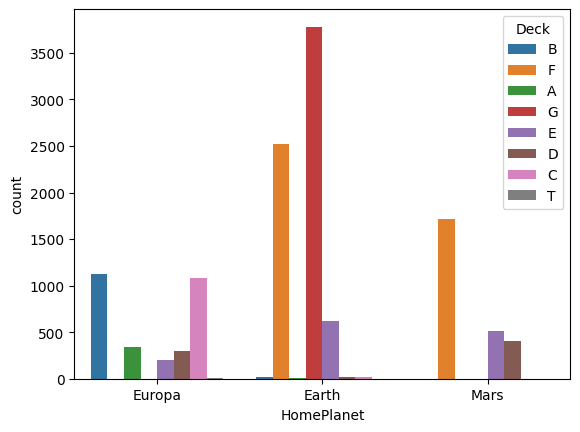

In [26]:
sns.countplot(data=df, x='HomePlanet', hue='Deck')

Связь между HomePlanet и Deck:
- Earth - чаще F, G, иногда E
- Europa - чаще B, C
- Mars - F

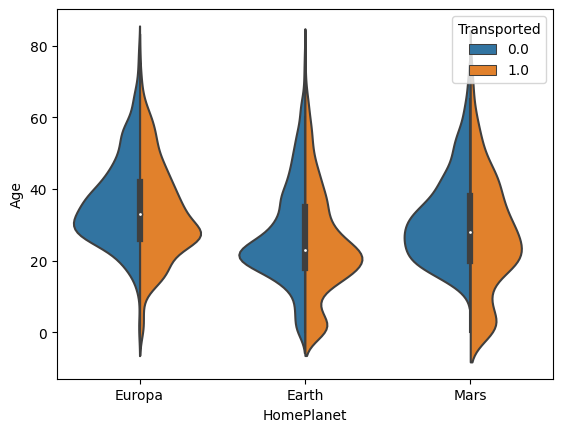

In [27]:
sns.violinplot(data=df, x='HomePlanet', y='Age', hue='Transported', split=True);

- Дети с Europa, Mars добрались до точки назначения
- Чаще добирались более молодые пассажиры
- Больше всего пассажиров в возрасте от 20 до 40 лет

In [28]:
df.loc[(df['Deck'].isna()) & (df['HomePlanet'] == 'Earth'), 'Deck'] = np.random.choice(['F', 'G'])

In [29]:
df.loc[(df['Deck'].isna()) & (df['HomePlanet'] == 'Mars'), 'Deck'] = 'F'
df.loc[(df['Deck'].isna()) & (df['HomePlanet'] == 'Europa'), 'Deck'] = np.random.choice(['B', 'C'])

In [30]:
df.Num.unique()

array(['0', '1', '2', ..., '1885', '1887', '1890'], dtype=object)

In [31]:
df['Num'].fillna(np.random.randint(0, 1894), inplace=True)

In [32]:
df.groupby(['Group'])['Side'].nunique().value_counts()

Side
1    4553
2    1625
0      39
Name: count, dtype: int64

Чаще у людей из одной группы одинаковая Side

In [33]:
df['Side'].fillna(df.groupby('Group')['Side'].transform('first'), inplace=True) 

Остальных заполним рандомным значением с равной вероятностью P и S

In [34]:
df['Side'].fillna(np.random.choice(['P', 'S'], p=[0.5, 0.5]), inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12970 non-null  object 
 2   CryoSleep     12970 non-null  bool   
 3   Cabin         12671 non-null  object 
 4   Destination   12970 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   float64
 14  Group         12970 non-null  object 
 15  Id            12970 non-null  object 
 16  Deck          12970 non-null  object 
 17  Num           12970 non-null  object 
 18  Side          12970 non-null  ob

In [36]:
df.Age.describe()

count    12700.000000
mean        28.771969
std         14.387261
min          0.000000
25%         19.000000
50%         27.000000
75%         38.000000
max         79.000000
Name: Age, dtype: float64

In [37]:
df['AgeGroup'] = pd.cut(df['Age'].tolist(), 4)
df['AgeGroup'].unique()

[(19.75, 39.5], (39.5, 59.25], (-0.079, 19.75], (59.25, 79.0], NaN]
Categories (4, interval[float64, right]): [(-0.079, 19.75] < (19.75, 39.5] < (39.5, 59.25] < (59.25, 79.0]]

In [38]:
df.loc[df['Age'] <= 19.75, 'Age'] = 0
df.loc[(df['Age'] > 19.75) & (df['Age'] <= 39.5), 'Age'] = 1
df.loc[(df['Age'] > 39.5) & (df['Age'] <= 59.25), 'Age'] = 2
df.loc[(df['Age'] > 59.25) & (df['Age'] <= 80.0), 'Age'] = 3

<Axes: xlabel='HomePlanet', ylabel='count'>

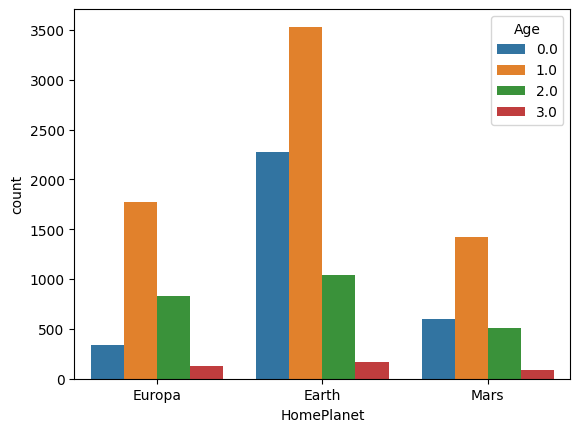

In [39]:
sns.countplot(data=df, x='HomePlanet', hue='Age')

Большиснтво пассажиров относятся к первой возрастной группк

In [40]:
df['Age'].fillna(1, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   12970 non-null  object  
 1   HomePlanet    12970 non-null  object  
 2   CryoSleep     12970 non-null  bool    
 3   Cabin         12671 non-null  object  
 4   Destination   12970 non-null  object  
 5   Age           12970 non-null  float64 
 6   VIP           12674 non-null  object  
 7   RoomService   12707 non-null  float64 
 8   FoodCourt     12681 non-null  float64 
 9   ShoppingMall  12664 non-null  float64 
 10  Spa           12686 non-null  float64 
 11  VRDeck        12702 non-null  float64 
 12  Name          12676 non-null  object  
 13  Transported   8693 non-null   float64 
 14  Group         12970 non-null  object  
 15  Id            12970 non-null  object  
 16  Deck          12970 non-null  object  
 17  Num           12970 non-null  object  
 18  Side        

In [42]:
df['Bill'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

Общая сумма всех трат на борту

In [43]:
df['BillGroup'] = pd.cut(df['Bill'].tolist(), 4)
df['BillGroup'].unique()

[(-35.987, 8996.75], (8996.75, 17993.5], NaN, (26990.25, 35987.0], (17993.5, 26990.25]]
Categories (4, interval[float64, right]): [(-35.987, 8996.75] < (8996.75, 17993.5] < (17993.5, 26990.25] < (26990.25, 35987.0]]

In [44]:
df.loc[df['Bill'] <= 8996.75, 'Bill'] = 0
df.loc[(df['Bill'] > 8996.75) & (df['Bill'] <= 17993.5), 'Bill'] = 1
df.loc[(df['Bill'] > 17993.5) & (df['Bill'] <= 26990.25), 'Bill'] = 2
df.loc[(df['Bill'] > 26990.25) & (df['Bill'] <= 35987.0), 'Bill'] = 3

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   12970 non-null  object  
 1   HomePlanet    12970 non-null  object  
 2   CryoSleep     12970 non-null  bool    
 3   Cabin         12671 non-null  object  
 4   Destination   12970 non-null  object  
 5   Age           12970 non-null  float64 
 6   VIP           12674 non-null  object  
 7   RoomService   12707 non-null  float64 
 8   FoodCourt     12681 non-null  float64 
 9   ShoppingMall  12664 non-null  float64 
 10  Spa           12686 non-null  float64 
 11  VRDeck        12702 non-null  float64 
 12  Name          12676 non-null  object  
 13  Transported   8693 non-null   float64 
 14  Group         12970 non-null  object  
 15  Id            12970 non-null  object  
 16  Deck          12970 non-null  object  
 17  Num           12970 non-null  object  
 18  Side        

<Axes: xlabel='Bill', ylabel='count'>

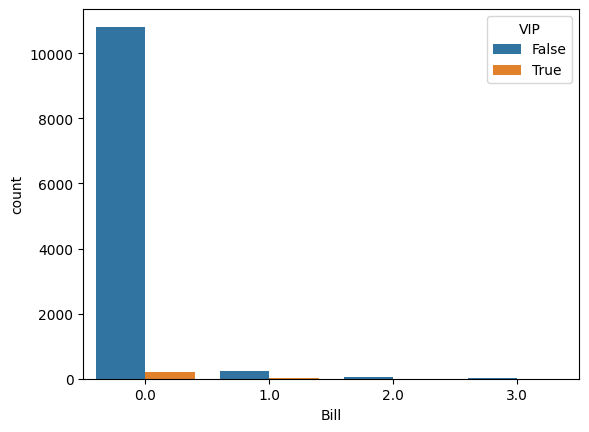

In [46]:
sns.countplot(data=df, x='Bill', hue='VIP')

(0.0, 300.0)

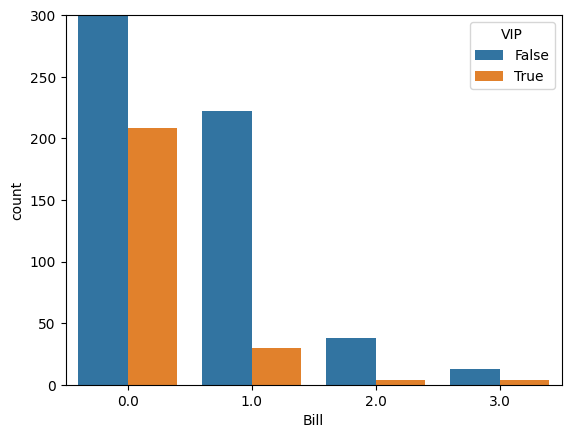

In [47]:
sns.countplot(data=df, x='Bill', hue='VIP')
plt.ylim([0, 300])

В основном у пассажиров нет VIP-статуса

In [48]:
df['VIP'].fillna(False, inplace=True)

<Axes: xlabel='Bill', ylabel='count'>

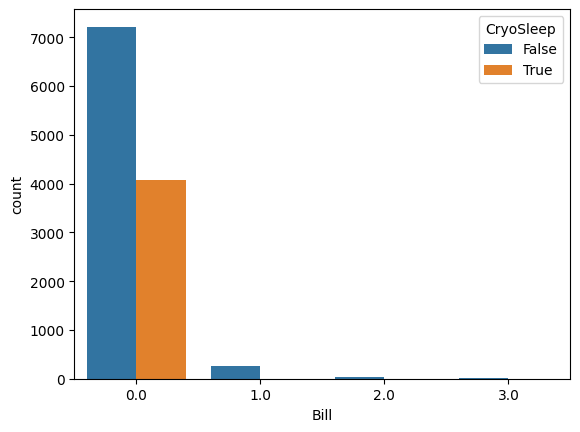

In [49]:
sns.countplot(data=df, x='Bill', hue='CryoSleep')

У находящихся в криосне нулевой счет

In [50]:
df[df['CryoSleep'] == True]['Bill'] = 0

In [51]:
df[['CryoSleep', 'VIP']] = df[['CryoSleep', 'VIP']].astype(int)

<Axes: >

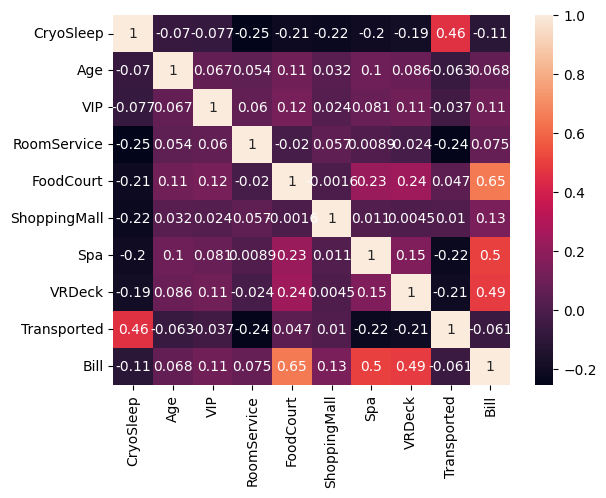

In [52]:
numeric_cols = df.select_dtypes(include = 'number').columns.tolist()
sns.heatmap(df[numeric_cols].corr(), annot=True)

In [53]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy = 'median')

In [54]:
luxury_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [55]:
for col in luxury_cols:
    df[col] = median_imputer.fit_transform(df[col].values.reshape(-1,1))

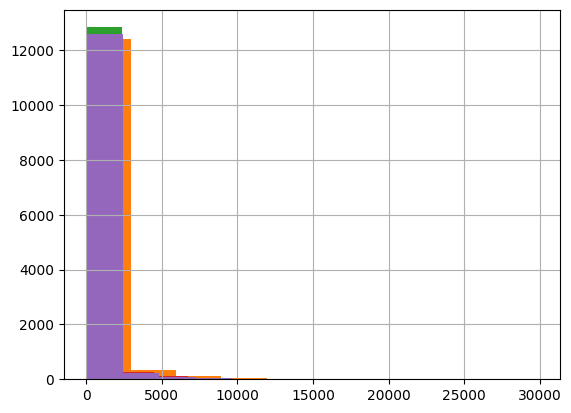

In [56]:
for col in luxury_cols:
    df[col].hist()

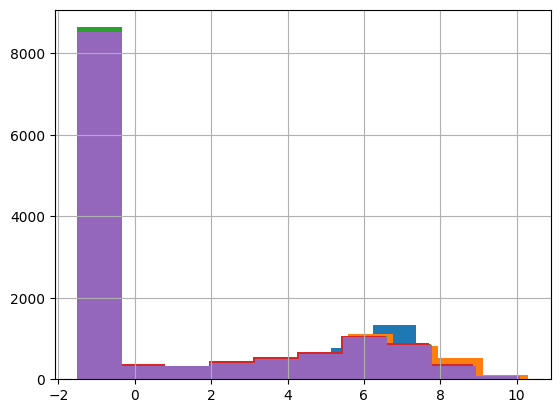

In [57]:
for col in luxury_cols:
    df.loc[df[col]==0, col] = 0.223
    np.log(df[col]).hist()
    df[col] = np.log(df[col])

Распределение логарифма близко к нормальному, в отличии от изначального распределения

In [58]:
PassengerIds = df['PassengerId'].iloc[data.shape[0]:]

In [60]:
df.drop(['Cabin', 'Name', 'AgeGroup', 'BillGroup', 'Id', 'PassengerId'], \
        axis=1, inplace=True)

In [61]:
df['Num'] = df['Num'].astype(int)

In [62]:
df['Group'] = df['Group'].astype(int)

In [63]:
df = pd.get_dummies(df,columns = ['HomePlanet', 'Destination', 'Deck', 'Side'], dtype='int')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  12970 non-null  int32  
 1   Age                        12970 non-null  float64
 2   VIP                        12970 non-null  int32  
 3   RoomService                12970 non-null  float64
 4   FoodCourt                  12970 non-null  float64
 5   ShoppingMall               12970 non-null  float64
 6   Spa                        12970 non-null  float64
 7   VRDeck                     12970 non-null  float64
 8   Transported                8693 non-null   float64
 9   Group                      12970 non-null  int32  
 10  Num                        12970 non-null  int32  
 11  Bill                       11607 non-null  float64
 12  HomePlanet_Earth           12970 non-null  int32  
 13  HomePlanet_Europa          12970 non-null  int32  
 

In [65]:
df.drop(['HomePlanet_Earth', 'Destination_55 Cancri e', 'Deck_A'], axis=1, inplace=True)

Избавляемся от мультиколлинеарности

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  12970 non-null  int32  
 1   Age                        12970 non-null  float64
 2   VIP                        12970 non-null  int32  
 3   RoomService                12970 non-null  float64
 4   FoodCourt                  12970 non-null  float64
 5   ShoppingMall               12970 non-null  float64
 6   Spa                        12970 non-null  float64
 7   VRDeck                     12970 non-null  float64
 8   Transported                8693 non-null   float64
 9   Group                      12970 non-null  int32  
 10  Num                        12970 non-null  int32  
 11  Bill                       11607 non-null  float64
 12  HomePlanet_Europa          12970 non-null  int32  
 13  HomePlanet_Mars            12970 non-null  int32  
 

In [68]:
df['Bill'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

## Train Test Split ##

In [69]:
train_df, test_df = df.iloc[:data.shape[0]], df.iloc[data.shape[0]:]

In [70]:
X = train_df.drop('Transported', axis=1)
y = train_df['Transported']

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=17)

## Логистическая регрессия ##

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
accuracy_score(train_pred, y_train), accuracy_score(y_val, val_pred)

(0.7617198734541272, 0.772857964347326)

In [74]:
X_test = test_df.drop('Transported', axis=1)

In [75]:
subm_df = pd.DataFrame({'PassengerId' : PassengerIds,
                   'Transported' : model.predict(X_test).astype(bool)
                  })
subm_df.to_csv('submission.csv', index=False)

Score - 0.778

## Попробуем основные модели ##

In [77]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, BaggingClassifier,
                              ExtraTreesClassifier, GradientBoostingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [78]:
cat = CatBoostClassifier(verbose = False)
rfc = RandomForestClassifier(max_depth = 5, random_state=42)
dtc = DecisionTreeClassifier(max_depth=5)
abc = AdaBoostClassifier(random_state=42)
bc = BaggingClassifier(random_state=42)
gbdt = GradientBoostingClassifier(learning_rate=0.05, max_depth=8, n_estimators=500,subsample=0.5213,random_state=42)
xgb = XGBClassifier('binary:logistic',colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=5, 
                             min_child_weight=1.7817, n_estimators=500,
                             reg_alpha=4.5, reg_lambda=8.5,
                             subsample=0.5213,
                             random_state=42)
lgb = LGBMClassifier()

In [79]:
clfs = {
    'CBC':cat,
    'RF': rfc, 
    'DTC':dtc,
    'ABC':abc,
    'BC':bc,
    'GBDT':gbdt,
    'xgb':xgb,
    'LGB':lgb
}

In [80]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    return accuracy

In [81]:
from sklearn.model_selection import cross_val_score
for name, clf in clfs.items():
    print(f'for {name}, the cross_val_score is ') 
    print(np.mean(cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')))
    print('-'*30)

for CBC, the cross_val_score is 
0.8106124158904364
------------------------------
for RF, the cross_val_score is 
0.7589891853591175
------------------------------
for DTC, the cross_val_score is 
0.7739429735866231
------------------------------
for ABC, the cross_val_score is 
0.7903361279344605
------------------------------
for BC, the cross_val_score is 
0.7768195335895195
------------------------------
for GBDT, the cross_val_score is 
0.7960891445003593
------------------------------
for xgb, the cross_val_score is 
0.8062975241661452
------------------------------
for LGB, the cross_val_score is 
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2796, number of negative: 2767
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [

Лучше всего себя показал catboost

In [83]:
model = CatBoostClassifier(verbose = False)
model.fit(X_train,y_train)

In [84]:
subm_df = pd.DataFrame({'PassengerId' : PassengerIds,
                   'Transported' : model.predict(X_test).astype(bool)
                  })
subm_df.to_csv('catboost.csv', index=False)

Score - 0.7912

Подберем параметры для catboost

In [94]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'iterations': [200, 500, 800, 1000,1200],
    'learning_rate': [0.01, 0.1, 0.3],
    'border_count': [50, 100, 150,200],
    'depth': [4, 6, 8],
}

catboost = CatBoostClassifier(verbose = False)

randomize_search = RandomizedSearchCV(estimator=catboost, param_distributions=param_grid, cv=5)

randomize_search.fit(X_train, y_train)

best_params = randomize_search.best_params_
best_score = randomize_search.best_score_

best_catboost = CatBoostClassifier(**best_params)

best_catboost.fit(X_train, y_train)

0:	learn: 0.6880823	total: 4.61ms	remaining: 5.53s
1:	learn: 0.6831765	total: 9.35ms	remaining: 5.6s
2:	learn: 0.6788070	total: 14.2ms	remaining: 5.66s
3:	learn: 0.6740307	total: 18.7ms	remaining: 5.59s
4:	learn: 0.6701477	total: 23.4ms	remaining: 5.58s
5:	learn: 0.6657599	total: 28.1ms	remaining: 5.59s
6:	learn: 0.6610973	total: 33.2ms	remaining: 5.66s
7:	learn: 0.6559778	total: 38.1ms	remaining: 5.68s
8:	learn: 0.6507430	total: 43.2ms	remaining: 5.72s
9:	learn: 0.6470989	total: 48.2ms	remaining: 5.73s
10:	learn: 0.6425422	total: 52.9ms	remaining: 5.72s
11:	learn: 0.6382404	total: 58.1ms	remaining: 5.75s
12:	learn: 0.6333725	total: 63.5ms	remaining: 5.8s
13:	learn: 0.6292615	total: 68.6ms	remaining: 5.81s
14:	learn: 0.6254147	total: 73.9ms	remaining: 5.83s
15:	learn: 0.6219539	total: 79.3ms	remaining: 5.87s
16:	learn: 0.6185387	total: 84.3ms	remaining: 5.87s
17:	learn: 0.6157101	total: 89.5ms	remaining: 5.88s
18:	learn: 0.6123167	total: 94.7ms	remaining: 5.88s
19:	learn: 0.6088066	tot

In [95]:
best_cat_params = best_params

In [96]:
subm_df = pd.DataFrame({'PassengerId' : PassengerIds,
                   'Transported' : best_catboost.predict(X_test).astype(bool)
                  })
subm_df.to_csv('catboost_pred.csv', index=False)

Score - 0.79775

In [97]:
from xgboost import XGBClassifier
param_grid = {
     'n_estimators': [900, 1000, 1100],
     'learning_rate': [0.01, 0.1, 0.3],
     'max_depth': [3, 5, 7],
     'subsample': [0.8, 0.9, 1.0],
     'colsample_bytree': [0.8, 0.9, 1.0],
     'reg_alpha': [0, 0.1, 0.5],
     'reg_lambda': [0, 0.1, 0.5]
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=10, cv=5)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_
best_xgb = XGBClassifier(**best_params)
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [98]:
print(best_params)
print(best_score)

{'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
0.8077353386880718


In [99]:
best_xgb_params = best_params

In [100]:
subm_df = pd.DataFrame({'PassengerId' : PassengerIds,
                   'Transported' : best_xgb.predict(X_test).astype(bool)
                  })
subm_df.to_csv('xgbpred.csv', index=False)

Score - 0.79331

In [101]:
from sklearn.ensemble import VotingClassifier

In [102]:
best_catboost = CatBoostClassifier(**best_cat_params)
best_xg = XGBClassifier(**best_xgb_params)

In [103]:
voting = VotingClassifier(estimators=[('cat', best_catboost), ('xg', best_xg)],voting='soft')
voting.fit(X_train,y_train)

0:	learn: 0.6880823	total: 5.13ms	remaining: 6.15s
1:	learn: 0.6831765	total: 10.2ms	remaining: 6.12s
2:	learn: 0.6788070	total: 15.3ms	remaining: 6.11s
3:	learn: 0.6740307	total: 20.3ms	remaining: 6.07s
4:	learn: 0.6701477	total: 25.4ms	remaining: 6.06s
5:	learn: 0.6657599	total: 31.6ms	remaining: 6.3s
6:	learn: 0.6610973	total: 39.1ms	remaining: 6.67s
7:	learn: 0.6559778	total: 45.6ms	remaining: 6.79s
8:	learn: 0.6507430	total: 50.4ms	remaining: 6.67s
9:	learn: 0.6470989	total: 54.8ms	remaining: 6.52s
10:	learn: 0.6425422	total: 59.6ms	remaining: 6.44s
11:	learn: 0.6382404	total: 64.3ms	remaining: 6.37s
12:	learn: 0.6333725	total: 68.6ms	remaining: 6.27s
13:	learn: 0.6292615	total: 73.2ms	remaining: 6.2s
14:	learn: 0.6254147	total: 77.6ms	remaining: 6.13s
15:	learn: 0.6219539	total: 83.1ms	remaining: 6.15s
16:	learn: 0.6185387	total: 87.9ms	remaining: 6.12s
17:	learn: 0.6157101	total: 92.3ms	remaining: 6.06s
18:	learn: 0.6123167	total: 96.8ms	remaining: 6.02s
19:	learn: 0.6088066	tot

VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x000001C6E3897A50>),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy...e,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                 voting='soft')

In [104]:
y_pred2 = voting.predict(X_val)
acc_final = accuracy_score(y_val,y_pred2)
print("Accuracy",acc_final)

Accuracy 0.8113858539390454


In [105]:
voting_pred = voting.predict(X_test)

In [106]:
subm_df = pd.DataFrame({'PassengerId' : PassengerIds,
                   'Transported' : voting.predict(X_test).astype(bool)
                  })
subm_df.to_csv('voting.csv', index=False)

Score - 0.79214